In [15]:
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import StandardScaler

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf

In [2]:
df = pd.read_csv('./archive/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [23]:
print(df.keys())


Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')


In [13]:
# Basic Information & Data Description
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Check if any duplicated value exists. It turns out to be zero, and it means there's no duplicates.
df.duplicated().sum()

# Check if there's a null in the dataset. It also turns out to be zero, and it means there's no null on here. 
df.isnull().sum()

# Type Check. All attributes is belonged to a float type  
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

<AxesSubplot:>

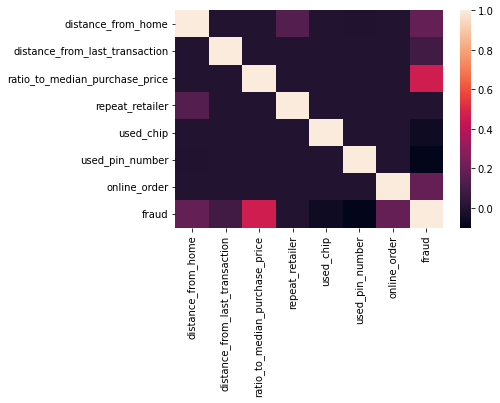

In [9]:
# Correlation Visualization 
sns.heatmap(df.corr())

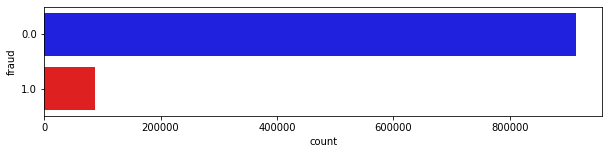

In [10]:
plt.figure(figsize=(10, 2))
fig = sns.countplot(y=df['fraud'],
                    data=df, palette=["blue", "red"])
plt.show()


In [26]:
# Differentiate 
X = df[df.columns.difference(['fraud'])]
y = df["fraud"]
print('X:', X.shape)

# Standardizing the features
X = StandardScaler().fit_transform(X)

X: (1000000, 7)


<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

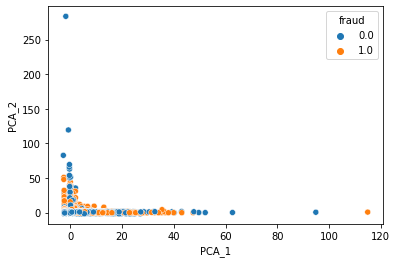

In [22]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns = ['PCA_1', 'PCA_2'])
principal_df.head()

final_df = pd.concat([principal_df, df[['fraud']]], axis=1)

# Data Visualization 
plt.figure(figsize=(6, 4))
sns.scatterplot(final_df['PCA_1'], final_df['PCA_2'], hue=df['fraud'])
